# Homework 7.3

In [1]:
import numpy as np
from scipy.integrate import quad
from matplotlib import pyplot as plt
from math import sqrt

## 7.14 

Implement the Metropolis-Hastings sampling algorithm for continuous target distributions on $\mathbb{R}$, using the normal distribution for the proposal. Your code should to the following:
* i. Accept a target $f(x)$, a choice of $\sigma ^2$, an initial starting point $x_0$, a number of steps K for "burn in", and a number of samples $N$ to keep after burn in.
* ii. At each stage $t\in {0,...,N+K-1}$ draw a proposal $y$ from $\mathscr{N}(\mu=x_i,\sigma ^2)$.
* iii. Decide whether to accept $y$ (set $x_{t+1}=y$) or reject $y$ (set $x_{t+1}=x_t$) based on the acceptance probability $a_{xy}$
* iv. Increment $t$ by one (t+=1) and repeat from (ii).

Given a target distribution of $f(x)=4e^{-\frac{(x+3)^2}{4}}+6e^{-\frac{(x-5)^2}{32}}$, with $\sigma ^2=1$ and an initial value of $x_0=5$, and no burn in ($K=0$), run your sampler for $10^5$ steps. Note that the target $f$ is not a pdf becuase it does not integrate to 1. Use your sample to estimate the integral $Z=\int _{-\infty}^{\infty} f(x)dx$. Also use a numerical quadrature method to approximate $Z$, and compare the results of your two computations. Plot a histogram of your samlpes and on the same graph plot $\frac{f}{Z}$

Change your starting point to $x_0=-30$ and run your sampler for $10^5$ steps. For each $k\in {1,2,...,5}$ plot a histogram fo the first $10^k$ samples and also plot $\frac{f}{Z}$.

Use all these results and plots to determine a good value $K$ for the burn in, independent of an initial value in [-30,50]. Justify your choice.

In [47]:
def metro_hast_cont(f,sig_sqrd,x0,K,N) :
    x = [x0 for i in range(N+K)]
    for t in range(1,N+K) :
        y = np.random.normal(loc=x[t-1],size=sig_sqrd)[0]
        if f(x[t-1]) != 0 :
            axy = f(y)/f(x[t-1])
            if axy > 1 :
                axy = 1
        else :
            axy = 1
        if np.random.uniform(0,1) <= axy :
            x[t] = y
        else :
            x[t] = x[t-1]
    return x[K:]

In [3]:
f = lambda x : 4*np.exp(-(x+3)**2/4) + 6*np.exp(-(x-5)**2/32)
sig_sqrd = 1
x0 = 5
K = 0
N = 10**5
results = metro_hast_cont(f,sig_sqrd,x0,K,N)
#print(results)
Z,err = quad(f,-np.inf,np.inf)

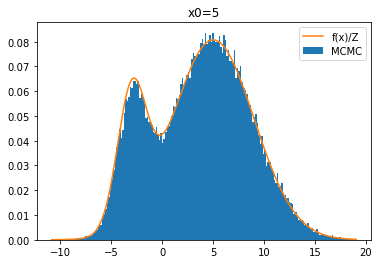

In [4]:
X = np.linspace(min(results),max(results),200)
Y = [f(x)/Z for x in X]
plt.hist(results,normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=5')
plt.show()

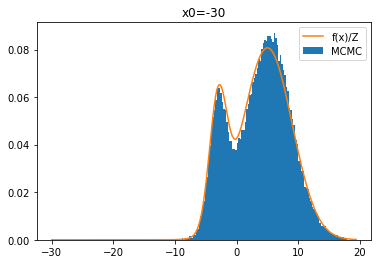

In [5]:
x0 = -30
res = metro_hast_cont(f,sig_sqrd,x0,K,N)
X = np.linspace(min(res),max(res),200)
Y = [f(x)/Z for x in X]
plt.hist(res,normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-30')
plt.show()

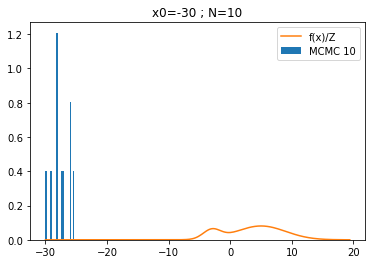

In [6]:
plt.hist(res[:10**1],normed=True,bins=X,label='MCMC 10')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-30 ; N=10')
plt.show()

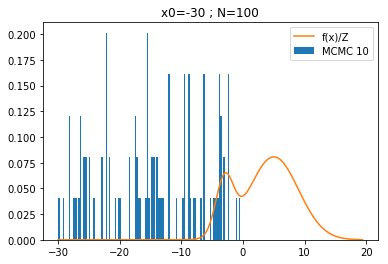

In [7]:
plt.hist(res[:10**2],normed=True,bins=X,label='MCMC 10')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-30 ; N=100')
plt.show()

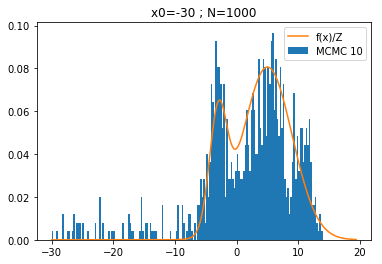

In [8]:
plt.hist(res[:10**3],normed=True,bins=X,label='MCMC 10')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-30 ; N=1000')
plt.show()

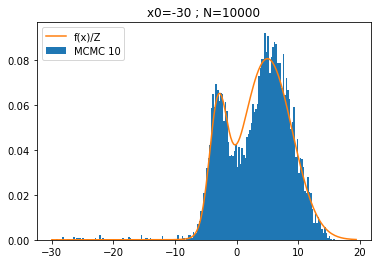

In [9]:
plt.hist(res[:10**4],normed=True,bins=X,label='MCMC 10')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-30 ; N=10000')
plt.show()

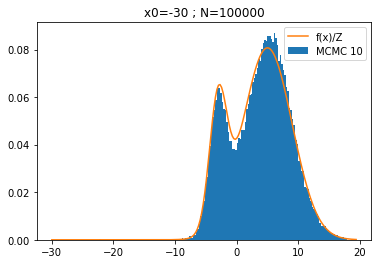

In [10]:
plt.hist(res[:10**5],normed=True,bins=X,label='MCMC 10')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-30 ; N=100000')
plt.show()

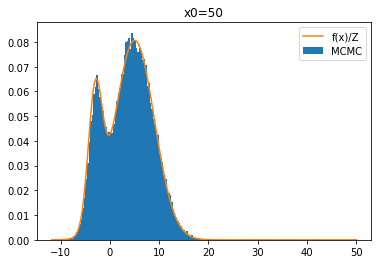

In [11]:
x0 = 50
res = metro_hast_cont(f,sig_sqrd,x0,K,N)
X = np.linspace(min(res),max(res),200)
Y = [f(x)/Z for x in X]
plt.hist(res,normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50')
plt.show()

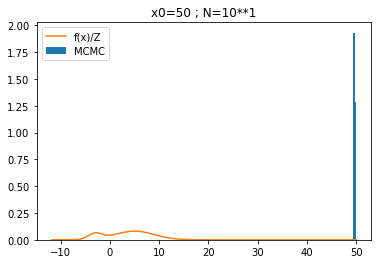

In [12]:
plt.hist(res[:10**1],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50 ; N=10**1')
plt.show()

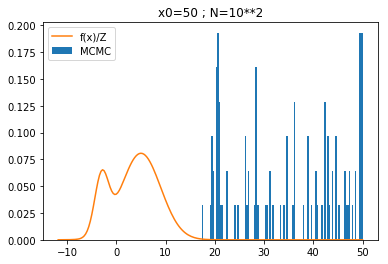

In [13]:
plt.hist(res[:10**2],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50 ; N=10**2')
plt.show()

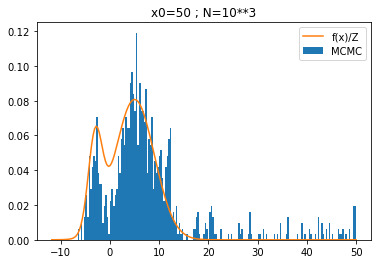

In [14]:
plt.hist(res[:10**3],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50 ; N=10**3')
plt.show()

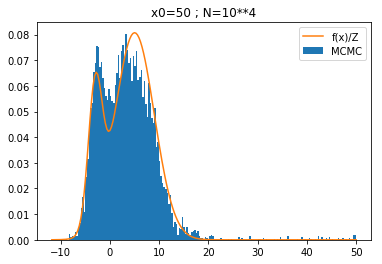

In [15]:
plt.hist(res[:10**4],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50 ; N=10**4')
plt.show()

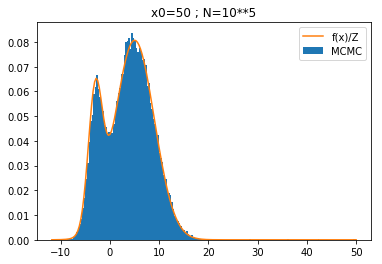

In [16]:
plt.hist(res[:10**5],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50 ; N=10**5')
plt.show()

The first $10^{2}$ terms will get you to the high density zone without having a bunch already there, and since in the first $10^{3}$ there are a fair number already in the dense area, I'd say that a good value for $K$ is $10^{2}$.

## 7.15

Using your code from the prvious problem, run your sampler with a target distribution of $f(x)=4e^{-\frac{(x+3)^2}{0.25}}+6e^{-(x-5)^2}$. Use a numerical quadrature method to estimate $Z=\int_{-\infty}^{\infty}f(x)dx$. Taking $\sigma ^2=1$, for each starting point of $x_0\in {-10,...,10}$, run your sampler with $K=10^5$ and $N=10^5$. Plot a histogram of the results of each run, and on the same graph plot $\frac{f}{Z}$. Can you use any of your runs to estimate the value of $Z$ accurately? Why or why not? Change your starting point to $x_0=50$ and run your sampler for $10^5$ steps. For each $k\in {1,2,...,5}$ plot a histogram of the first $10^k$ sapmles and also plot $\frac{f}{Z}$

Use all these results and plots to determine a good value $K$ for burn in, independent of an intial value in [-30,50]. Justify your choice.

In [17]:
f = lambda x : 4*np.exp(-(x+3)**2*4) + 6*np.exp(-(x-5)**2)
sig_sqrd = 1
x0 = [i for i in range(-10,11)]
K = 10**5
N = 10**5
results = [metro_hast_cont(f,sig_sqrd,x,K,N) for x in x0]
Z,err = quad(f,-np.inf,np.inf)
X = np.linspace(-10,10,200)
Y = [f(x)/Z for x in X]

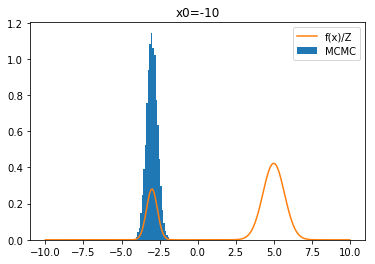

In [18]:
plt.hist(results[0],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-10')
plt.show()

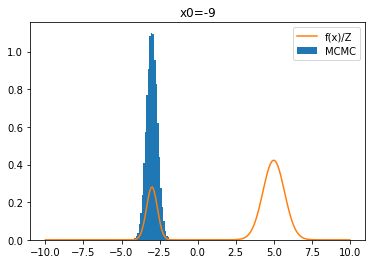

In [19]:
plt.hist(results[1],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-9')
plt.show()

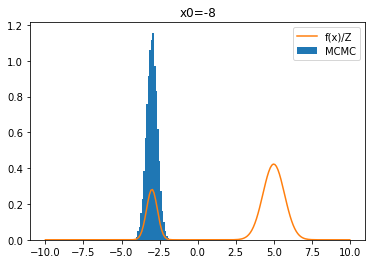

In [20]:
plt.hist(results[2],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-8')
plt.show()

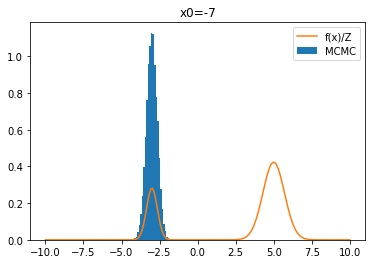

In [21]:
plt.hist(results[3],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-7')
plt.show()

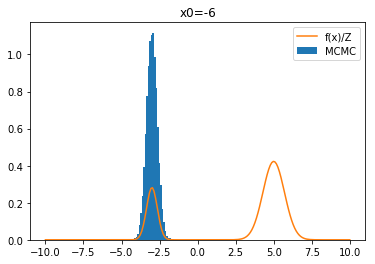

In [22]:
plt.hist(results[4],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-6')
plt.show()

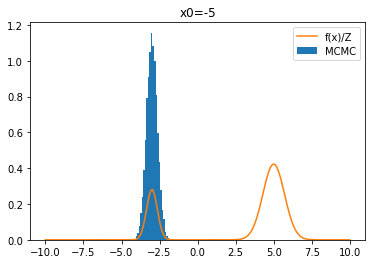

In [23]:
plt.hist(results[5],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-5')
plt.show()

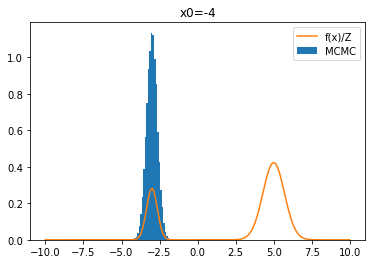

In [24]:
plt.hist(results[6],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-4')
plt.show()

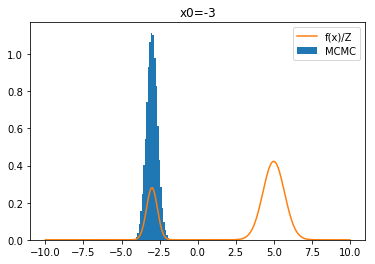

In [25]:
plt.hist(results[7],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-3')
plt.show()

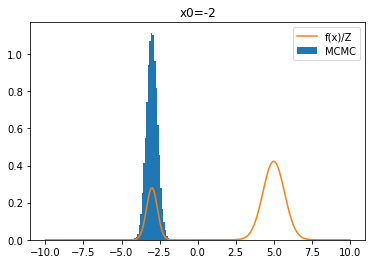

In [26]:
plt.hist(results[8],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-2')
plt.show()

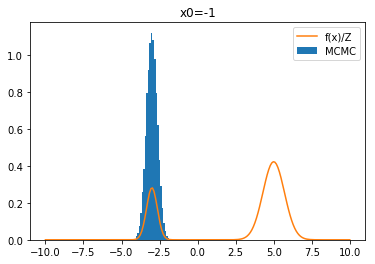

In [27]:
plt.hist(results[9],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=-1')
plt.show()

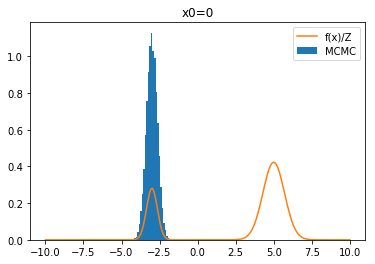

In [28]:
plt.hist(results[10],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=0')
plt.show()

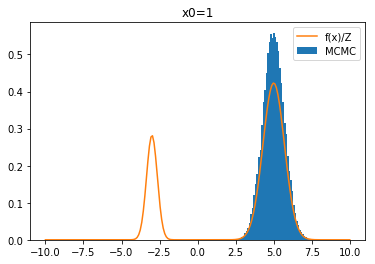

In [29]:
plt.hist(results[11],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=1')
plt.show()

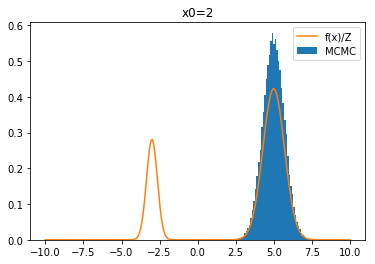

In [30]:
plt.hist(results[12],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=2')
plt.show()

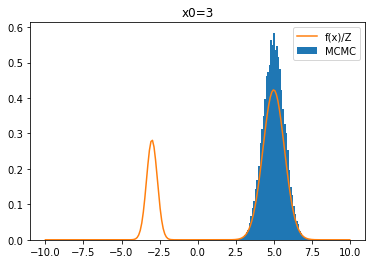

In [31]:
plt.hist(results[13],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=3')
plt.show()

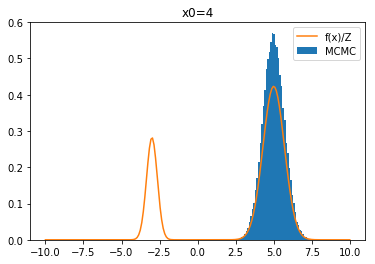

In [32]:
plt.hist(results[14],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=4')
plt.show()

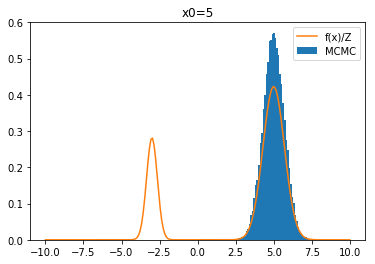

In [33]:
plt.hist(results[15],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=5')
plt.show()

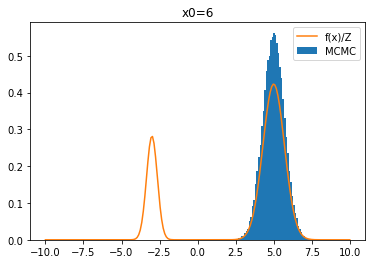

In [34]:
plt.hist(results[16],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=6')
plt.show()

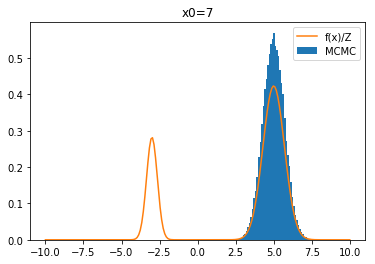

In [35]:
plt.hist(results[17],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=7')
plt.show()

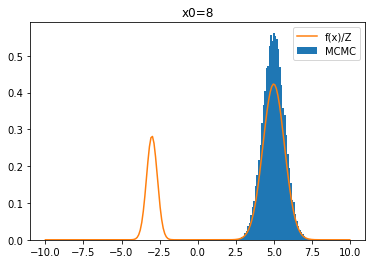

In [36]:
plt.hist(results[18],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=8')
plt.show()

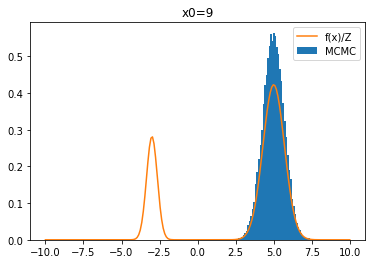

In [37]:
plt.hist(results[19],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=9')
plt.show()

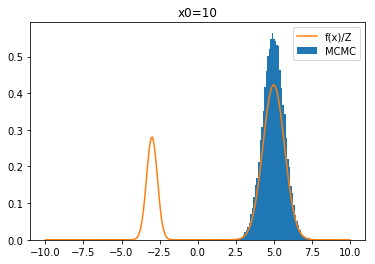

In [38]:
plt.hist(results[20],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=10')
plt.show()

No, we can't use any of these samples to estimate it, because in both cases they completely ignore the other "hill" or dense zone.  We can't get an accurate value because once we get into one, they're dense enough that we won't get into the other.

In [78]:
f = lambda x : 4*np.exp(-(x+3)**2*4) + 6*np.exp(-(x-5)**2)
sig_sqrd = 1
x0 = 50
K = 0
N = 10**5
results = metro_hast_cont(f,sig_sqrd,x0,K,N)
Z,err = quad(f,-np.inf,np.inf)
X = np.linspace(-10,50,500)
Y = [f(x)/Z for x in X]

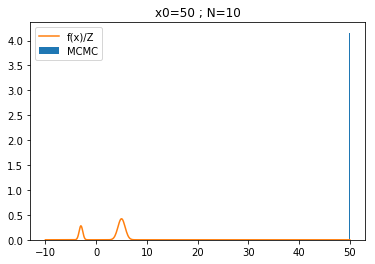

In [79]:
plt.hist(results[:10**1],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50 ; N=10')
plt.show()

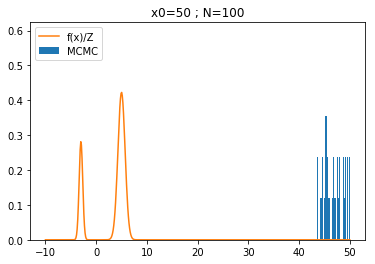

In [80]:
plt.hist(results[:10**2],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50 ; N=100')
plt.show()

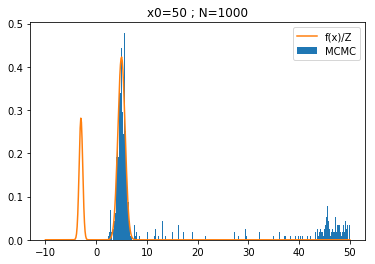

In [81]:
plt.hist(results[:10**3],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50 ; N=1000')
plt.show()

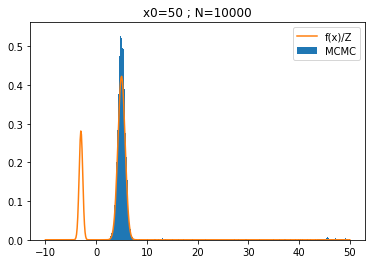

In [82]:
plt.hist(results[:10**4],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50 ; N=10000')
plt.show()

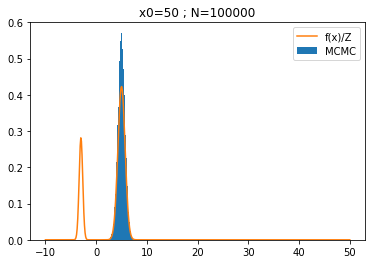

In [83]:
plt.hist(results[:10**5],normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=50 ; N=100000')
plt.show()

It would seem that $10^{2}$ is too few, and $10^{3}$ already has a good portion in the "dense" zone.  Thus, to ensure accuracy, I'd say burn in $10^{3}$ is a good "burn in" amount.

## 7.16

Adjust your code from the previous two problems to implement the Metropolis-Hastings sampling algorithm for continuous target distribution on $\mathbb{R}$, using the *uniform distribution* for the proposal. Your code should do the following.
* i. Accept a target $f(x)$, a choice of $L$, an initial starting point $x_0$, a number of steps $K$ for burn in, and a number of sample $N$ to keep after burn in.
* ii. At each stage $t\in {0,...,N+K-1}$ draw a proposal $y$ from Unif([$x_i-L, x_i+L$]).
* iii. Decide whether to accept $y$ (set $x_{t+1}=y$) or reject $y$ (set $x_{t+1}=x_t$) ased on the acceptance probability $a_{xy}$
* iv. Increment $t$ by one (t+=1) and repeat from ii. 

Given a target $f(x)=4e^{-\frac{(x+3)^2}{4}}+6e^{-\frac{(x-5)^2}{32}}$, with $L=1$ and an initial value of $x_0=5$, and burn in $K=10^5$, run your sampler for $N=10^5$ steps. Use your sample to estimate the integral $Z=\int_{-\infty}^{\infty}f(x)dx$ and compare to the value $Z$ computed using numerical quadrature and to the result computed in a previous problem. Plot a histogram of your samples and on the same graph plot $\frac{f}{Z}$.

In [45]:
def metro_hast_cont_unif(f,L,x0,K,N) :
    x = [x0 for i in range(N+K)]
    for t in range(1,N+K) :
        y = np.random.uniform(x[t-1]-L,x[t-1]+L)
        axy = f(y)/f(x[t-1])
        if np.random.uniform(0,1) <= axy :
            x[t] = y
        else :
            x[t] = x[t-1]
    return x[K:]

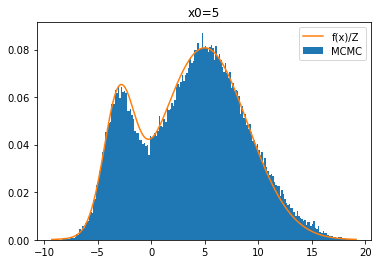

In [46]:
f = lambda x : 4*np.exp(-(x+3)**2/4) + 6*np.exp(-(x-5)**2/32)
x0 = 5
L = 1
K = 10**5
N = 10**5
Z,err = quad(f,-np.inf,np.inf)
results = metro_hast_cont_unif(f,L,x0,K,N)
X = np.linspace(min(results),max(results),200)
Y = [f(x)/Z for x in X]
plt.hist(results,normed=True,bins=X,label='MCMC')
plt.plot(X,Y,label='f(x)/Z')
plt.legend(loc='best')
plt.title('x0=5')
plt.show()